In [40]:
%matplotlib widget 
import numpy as np
from scipy.signal import butter, filtfilt
from scipy import signal, ndimage
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
import numpy as np
import adi
Data = adi.read_file(r"F:\正常人Data\Normal1\四下午\Normal1.adicht")

#PPG右手
channel1_id = 2 
#PPG左手
channel2_id = 4
record_id = 1

Right = Data.channels[channel1_id-1].get_data(record_id)
Left = Data.channels[channel2_id-1].get_data(record_id)
# 創建Butterworth低通濾波器
def butter_lowpass_filter(data, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# 示例數據和濾波器參數
fs = 1000  # 取樣頻率
cutoff = 5  # 截止頻率

# 濾波
filtered_signal = butter_lowpass_filter(Right[1000:3000], cutoff, fs)


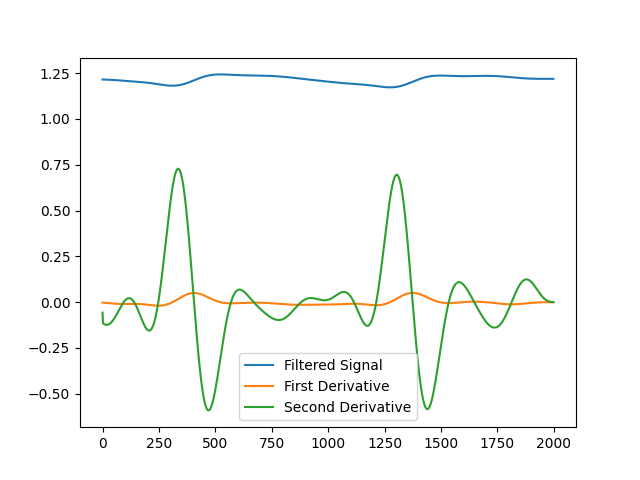

In [41]:
# 計算一階導數
fdppg = np.gradient(filtered_signal) * 100

# 計算二階導數
sdppg = np.gradient(fdppg) * 1000

plt.figure()
plt.plot(filtered_signal, label='Filtered Signal')
plt.plot(fdppg, label='First Derivative')
plt.plot(sdppg, label='Second Derivative')
plt.legend()
plt.show()